Vamos, usando os dados disponíveis no [Sistema de Contas Nacionais do IBGE](https://www.ibge.gov.br/estatisticas/economicas/contas-nacionais/9052-sistema-de-contas-nacionais-brasil.html?=&t=downloads), analisar a economia brasileira ao nível do **produto**, usando, para isso, as **Tabelas de Recursos e Usos** (TRUs, para os íntimos).

As TRUs contém uma série de dados para os diversos produtos e setores da economia.
De 2010 a 2019, há dados de dimensão 12 x 12, 20 x 20 e 128p x 68s. Para 2000 a 2019 (que é o que vamos usar), os dados possuem 107 produtos e 51 setores.
Aqui, vamos focar nos dados de produtos.

## Bibliotecas e Módulos

In [27]:
## Importando o que for necessário
# Manipulação de dados
import pandas as pd
import numpy as np

# Testes e regressões
from linearmodels.panel import PooledOLS, PanelOLS, compare

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from IPython.display import clear_output # limpa o output de uma célula


style.use('ggplot')  # estilo do R

In [2]:
### Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
## Definindo o caminho e o arquivo
# Caminho
sCaminho = "/content/drive/Othercomputers/Meu modelo MacBook Air/Documents/IPEA/Curso IDP/Disciplina 3 - Crescimento Econômico/Dados/"
sCaminho = "/Users/vinicius/Documents/IPEA/Curso IDP/Disciplina 3 - Crescimento Econômico/Dados/"

# Arquivo (ver arquivo de deflação!)
sArquivo = "Compilacao_Tru_RetroDEF.xlsx"

In [3]:
## Nomes das abas
vNomes = ["Exportação", "Consumo do Governo", "Consumo das Famílias_ISFLSF",
          "Investimento_FBCF", "Impostos_Subsidios", "Importação", "OfertaNacPB",
          "mOfertaTotPB", "mOfertaTotPC"]

## Produção

In [4]:
## Lendo o DataFrame
# Usaremos a Oferta Nacional a Preços Básicos como Produção
# Oferta nacional: só o que foi produzido no país (sem exportações e importações)
# PB: preços básicos/preço de fábrica (sem impostos e margens de comércio e transporte)
dfProducao = pd.read_excel(f"{sCaminho}{sArquivo}", sheet_name="OfertaNacPB", index_col=0)

# Vendo o tamanho da base
print(f"Linhas: {dfProducao.shape[0]}; Colunas: {dfProducao.shape[1]}")

Linhas: 107; Colunas: 20


In [5]:
## Vendo o DataFrame (valores em R$ milhões de cada ano)
dfProducao.head(5)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Arroz em casca,2114.751756,1932.464807,1981.454171,1960.210572,2518.240774,2477.575208,2165.108267,2077.104757,2265.977694,2376.718853,2139.380102,2620.208644,2210.098128,2272.717575,2350.485876,2384.640459,2057.025937,2417.277569,2311.051776,2015.355427
Milho em grão,6012.728095,7806.233616,6685.953088,9072.381382,7846.750125,6534.823628,8012.827740,9875.120944,11167.586945,9616.034372,10438.836126,10963.012242,13608.735635,15649.943536,15918.534577,16609.553708,12263.641123,19254.707098,16105.278480,19846.974548
Trigo em grão e outros cereais,534.887097,872.660165,786.589573,1512.435068,1490.951615,1199.218623,709.169241,1054.615405,1545.988258,1284.004268,1465.275459,1474.648223,1199.311505,1568.638318,1562.657157,1430.664007,1745.922638,1353.440137,1626.866849,1725.739133
Cana-de-açúcar,10308.631923,10884.076581,11521.518444,12520.460731,13128.342142,13371.800363,15092.559535,16433.895240,18507.355177,19848.871235,20572.618921,19998.481870,19451.989862,20764.558563,20077.235614,20228.109015,20592.460805,20225.492057,20100.176503,20465.287729
Soja em grão,9480.377318,10949.164540,12162.283870,14996.565402,14141.996950,14608.064112,14973.706453,16514.436703,17054.061401,16344.389944,19687.465382,21466.618743,18597.934874,23446.638994,24781.633274,27941.859402,27416.653801,32778.460105,33905.384248,32776.419873


In [6]:
## Descrevendo o DataFrame
np.around(dfProducao.describe(), 2)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00
mean,19511.56,19773.12,20238.86,20357.22,21497.89,22177.89,22967.35,24315.43,25529.72,25415.40,27262.68,28334.79,28999.13,29968.94,30072.33,28814.77,27805.14,28152.17,28702.86,29161.93
std,30142.31,30395.94,31126.72,31000.57,32609.69,33875.54,35301.66,37853.60,40178.72,41378.40,44686.40,46928.45,48876.44,50535.41,50791.17,48723.99,47033.94,46687.47,47625.18,48764.83
min,461.10,334.26,294.36,241.21,256.92,288.81,281.30,289.49,298.09,316.71,342.55,381.28,404.02,479.17,540.23,515.28,408.31,340.26,313.95,286.37
25%,3959.77,3951.97,4208.86,4039.66,4371.61,4489.70,4608.69,4639.24,4808.34,4678.77,4830.91,4978.67,5061.10,5226.86,5144.91,5077.88,4797.58,4961.13,4943.07,4946.32
50%,9480.38,9539.40,9196.75,9475.99,9516.24,10324.52,10886.75,11507.62,11722.76,11470.04,12028.16,12216.38,12681.51,12534.81,12947.54,12205.15,12084.05,12371.58,12252.23,12017.57
75%,20353.23,19228.28,18753.97,17916.36,19779.44,20135.17,19777.52,21785.68,22651.58,21272.27,22630.65,24067.03,23410.32,24165.37,24711.15,24471.21,23316.60,23600.12,25185.71,25436.82
max,146016.18,145069.94,149900.04,151257.78,158506.26,163094.97,168845.55,182555.14,193121.31,191863.40,213352.86,222089.15,229414.39,237985.38,240101.92,222916.74,211690.54,214927.24,221065.55,226538.47


<ipython-input-7-496ad65c28f9>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(['{:,.2f}'.format(x) for x in g.get_yticks()/1000000])


Text(0.5, 1.0, 'Produção Nacional')

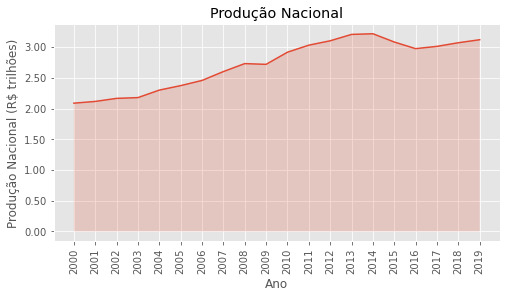

In [7]:
## Vamos primeiro criar um gráfico com a produção (nominal) total do Brasil
# Somando a produção total de cada ano
vProducaoTotal = np.sum(dfProducao, axis=0)

#### Plottando usando o seaborn
### Objeto gráfico
fig = plt.figure(figsize=(8, 4))

### Gráfico
## Linha
g = sns.lineplot(x=dfProducao.columns, y=vProducaoTotal)

## Área embaixo pra ficar bonitinho
plt.fill_between(x=dfProducao.columns, y1=vProducaoTotal, alpha=0.2)

### Eixos
## Rotacionando os anos para caberem no gráfico
plt.xticks(rotation=90)

## Colocando eixo y em trilhões
g.set_yticklabels(['{:,.2f}'.format(x) for x in g.get_yticks()/1000000])

### Títulos
plt.xlabel("Ano")
plt.ylabel("Produção Nacional (R$ trilhões)")
plt.title("Produção Nacional")

In [8]:
#### Ao invés de valores absolutos, podemos calcular a variação % da produção em cada ano!
## Calculando essa variação percentual
vVarProducao = pd.Series(vProducaoTotal)
vVarProducao = vVarProducao.pct_change()
vVarProducao

2000         NaN
2001    0.013405
2002    0.023554
2003    0.005848
2004    0.056033
2005    0.031631
2006    0.035597
2007    0.058695
2008    0.049939
2009   -0.004478
2010    0.072683
2011    0.039325
2012    0.023446
2013    0.033443
2014    0.003450
2015   -0.041818
2016   -0.035039
2017    0.012481
2018    0.019561
2019    0.015994
dtype: float64

<ipython-input-9-556f8c10c3f9>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(['{:,.2f}'.format(x) + "%" for x in 100*g.get_yticks()])


Text(0.5, 1.0, 'Variação da Produção Nacional (R$ 2000)')

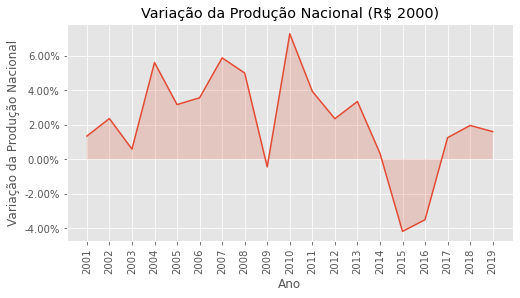

In [9]:
#### Plottando usando o seaborn
### Objeto gráfico
fig = plt.figure(figsize=(8, 4))

### Gráfico
## Linha
g = sns.lineplot(x=dfProducao.columns, y=vVarProducao)

## Área embaixo pra ficar bonitinho
plt.fill_between(x=dfProducao.columns, y1=vVarProducao, alpha=0.2)

### Eixos
## Rotacionando os anos para caberem no gráfico
plt.xticks(rotation=90)

## Colocando eixo y em porcentagem
g.set_yticklabels(['{:,.2f}'.format(x) + "%" for x in 100*g.get_yticks()])

### Títulos
plt.xlabel("Ano")
plt.ylabel("Variação da Produção Nacional")
plt.title("Variação da Produção Nacional (R$ 2000)")

### Produtos de Maior Peso

Agora que fizemos a análise agregada, podemos decompor os resultados por produto.

In [10]:
## Para que o nosso gráfico não fique muito caótico, vamos pegar apenas os 10 produtos mais produzidos nos últimos 20 anos,
## incorporando todos os demais em uma categoria chamada "Outros"

# Somando a produção total de cada produto
vProducaoTotalProduto = np.sum(dfProducao, axis=1)
vProducaoTotalProduto

Arroz em casca                         4.464785e+04
Milho em grão                          2.332897e+05
Trigo em grão e outros cereais         2.614368e+04
Cana-de-açúcar                         3.440939e+05
Soja em grão                           4.040241e+05
                                           ...     
Serviços associativos                  5.980723e+05
Serviços domésticos                    3.015246e+05
Educação pública                       9.226610e+05
Saúde pública                          7.944307e+05
Serviço público e seguridade social    3.711914e+06
Length: 107, dtype: float64

In [11]:
## Pegando os 10 maiores
dfMaiores = pd.DataFrame(vProducaoTotalProduto.nlargest(n=10))
dfMaiores

,0
Comércio,3.854350e+06
Serviço público e seguridade social,3.711914e+06
Construção civil,3.493508e+06
Intermediação financeira seguros e previdência complementar e serviços relacionados,3.371994e+06
Serviços prestados às empresas,3.240169e+06
Aluguel imputado,2.962899e+06
Serviços de informação,2.645978e+06
Produção e distribuição de eletricidade gás água esgoto e limpeza urbana,1.705097e+06
Transporte de carga,1.516468e+06
Atividades imobiliárias e aluguéis,1.308947e+06


In [12]:
## Unindo os DataFrames a fim de pegar apenas os maiores valores
dfMaiores = dfMaiores.merge(dfProducao, how="inner", left_index=True, right_index=True)

## Tirando a coluna de total
dfMaiores.drop([0], axis=1, inplace=True)

## Vendo resultado
dfMaiores.head(5)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Comércio,143766.942246,143734.278628,140634.419839,140422.007609,153037.710836,158591.569965,168845.553548,182555.138130,193121.306402,191863.404651,213352.859024,222089.147294,229414.391906,237985.382930,240101.922048,222916.737926,209386.152556,214927.241994,221065.554654,226538.469250
Serviço público e seguridade social,140375.707656,143649.999213,149900.037756,151257.783556,158506.262587,163094.973393,168325.609538,177577.039064,180669.392515,186859.449005,196296.474481,201940.648470,210920.747956,215122.433040,216751.492016,211372.396131,211690.536781,207690.875146,210762.979720,209149.361821
Construção civil,146016.177837,145069.938354,145807.637872,136184.509604,146570.664911,146158.660871,149448.437765,159670.581864,170649.193987,177116.183935,198815.337884,212677.734246,220790.405334,229269.103329,222693.575924,200747.949127,180373.020952,166808.931456,165881.050193,172759.318888
Intermediação financeira seguros e previdência complementar e serviços relacionados,105414.172763,106274.387396,108832.342636,105123.392877,108789.890763,115471.230128,125782.623166,144905.890163,164260.313742,179668.813841,197524.106883,208657.417663,212602.059336,217973.795608,218482.611641,218437.105660,209281.193823,206270.696506,207806.069061,210435.469077
Serviços prestados às empresas,119109.319453,115704.344441,121045.229219,120923.716289,124536.742193,134786.818627,140881.427331,150030.216708,159753.225654,162990.035307,174560.338303,182847.395836,192229.790046,198763.913720,198717.244906,188826.458464,185652.927493,183484.209125,188572.945130,196752.843740


In [13]:
## Temos que criar a linha de "Outros", que conterá todo o resto da produção
# Criando vetor com a produção dos outros produtos
vOutros = np.array(vProducaoTotal) - np.array(np.sum(dfMaiores, axis=0))

# Colocando no formato desejado
vOutros = vOutros.reshape((1, 20))

# Criando DataFrame
dfOutros = pd.DataFrame(vOutros, index=["Outros"], columns=dfMaiores.columns)

## Concatenando
dfMaiores = pd.concat((dfMaiores, dfOutros), axis=0)

## Vendo resultado
dfMaiores.tail(5)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Serviços de informação,8.660782e+04,9.215831e+04,9.663883e+04,1.003896e+05,1.027151e+05,1.077412e+05,1.097691e+05,1.163061e+05,1.270912e+05,1.276420e+05,1.327892e+05,1.415687e+05,1.534857e+05,1.594848e+05,1.666570e+05,1.633283e+05,1.601306e+05,1.623318e+05,1.660488e+05,1.730939e+05
Produção e distribuição de eletricidade gás água esgoto e limpeza urbana,6.468065e+04,6.137036e+04,6.323900e+04,6.604979e+04,6.959237e+04,7.196384e+04,7.473516e+04,7.867219e+04,8.291044e+04,8.150436e+04,8.969564e+04,9.334380e+04,9.579662e+04,1.001260e+05,1.028120e+05,1.008021e+05,9.927814e+04,1.005893e+05,1.025280e+05,1.054075e+05
Transporte de carga,5.566959e+04,5.731952e+04,5.950047e+04,5.888399e+04,6.242356e+04,6.471995e+04,6.695991e+04,7.123677e+04,7.669300e+04,7.235876e+04,8.031518e+04,8.461537e+04,8.744690e+04,9.013756e+04,9.243114e+04,8.805027e+04,8.357784e+04,8.603710e+04,8.838592e+04,8.970542e+04
Atividades imobiliárias e aluguéis,4.375924e+04,4.575791e+04,4.756872e+04,4.873771e+04,5.131713e+04,5.400550e+04,5.814751e+04,6.248751e+04,6.426710e+04,6.557975e+04,6.546609e+04,6.866456e+04,7.289197e+04,7.600331e+04,7.815059e+04,7.668700e+04,7.747394e+04,8.030749e+04,8.408812e+04,8.758572e+04
Outros,1.075048e+06,1.092801e+06,1.115242e+06,1.128072e+06,1.196624e+06,1.225201e+06,1.261177e+06,1.319211e+06,1.371205e+06,1.328814e+06,1.419846e+06,1.460258e+06,1.465220e+06,1.510734e+06,1.509054e+06,1.439221e+06,1.385897e+06,1.430113e+06,1.457307e+06,1.466964e+06


<Figure size 576x288 with 0 Axes>

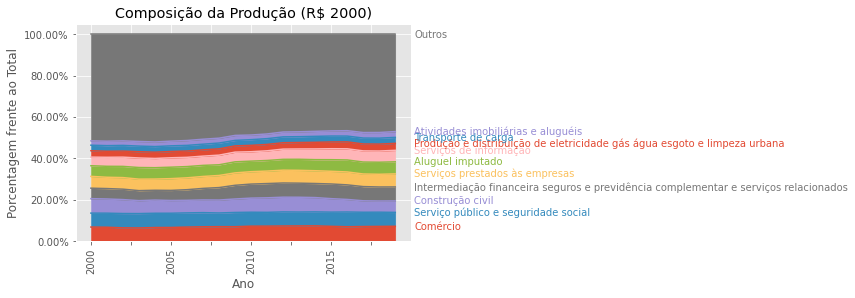

In [14]:
### Objeto gráfico
fig = plt.figure(figsize=(8, 4))

## Gráfico
# Transpomos para deixar os anos como index e os produtos como colunas
dfMaioresPercentual = (dfMaiores / vProducaoTotal).T

ax = dfMaioresPercentual.plot.area(legend=False)

### Eixos
## Rotacionando os anos para caberem no gráfico
plt.xticks(rotation=90)

## Colocando eixo y em porcentagem
ax.set_yticklabels(['{:,.2f}'.format(x) + "%" for x in 100*ax.get_yticks()])

### Títulos
plt.xlabel("Ano")
plt.ylabel("Porcentagem frente ao Total")
plt.title("Composição da Produção (R$ 2000)")

## Customizando a legenda para aparecer ao final do gráfico
# Para cada linha (área) no gráfico e para cada coluna do dataframe
for line, name in zip(ax.lines, dfMaioresPercentual.columns):
    # Pegando o valor do eixo y da linha (área)
    y = line.get_ydata()[-1]
    # Anotando no fim do eixo x (xycoords) e na posição y acima e colorindo com a mesma cor da área
    ax.annotate(name, xy=(1, y), xytext=(4, 0), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=10, va="center")

clear_output()

Alguns resultados interessantes: o comércio é o "produto" mais produzido no Brasil, seguido pelo serviço público + seguridade social (previdência) e construção civil.

Note que não aparece nenhum valor da agropecuária! Apesar de o Brasil se destacar nesse aspecto, o PIB (e a produção) é dominada pelo setor de Serviços.

## Função para deixar a análise automatizada

In [25]:
def gera_graficos(sNome):
  """
  Gera os gráficos acima de maneira automática, sem termos que digitar todo o código várias vezes.

  :param sNome: nome da aba com os dados no Excel
  """
  ## Leitura
  dfProducao = pd.read_excel(f"{sCaminho}{sArquivo}", sheet_name=sNome, index_col=0)

  # Somando o total de cada ano
  vProducaoTotal = np.sum(dfProducao, axis=0)

  #### Plottando usando o seaborn
  ### Objeto gráfico
  fig = plt.figure(figsize=(8, 4))

  ### Gráfico
  ## Linha
  g = sns.lineplot(x=dfProducao.columns, y=vProducaoTotal)

  ## Área embaixo pra ficar bonitinho
  plt.fill_between(x=dfProducao.columns, y1=vProducaoTotal, alpha=0.2)

  ### Eixos
  ## Rotacionando os anos para caberem no gráfico
  plt.xticks(rotation=90)

  ## Colocando eixo y em trilhões
  g.set_yticklabels(['{:,.2f}'.format(x) for x in g.get_yticks()/1000000])

  ### Títulos
  plt.xlabel("Ano")
  plt.ylabel(f"{sNome} (R$ trilhões)")
  plt.title(f"{sNome}")
  plt.show()

  ## Calculando variação percentual
  vVarProducao = pd.Series(vProducaoTotal)
  vVarProducao = vVarProducao.pct_change()

  ### Objeto gráfico
  fig = plt.figure(figsize=(8, 4))

  ### Gráfico
  ## Linha
  g = sns.lineplot(x=dfProducao.columns, y=vVarProducao)

  ## Área embaixo pra ficar bonitinho
  plt.fill_between(x=dfProducao.columns, y1=vVarProducao, alpha=0.2)

  ### Eixos
  ## Rotacionando os anos para caberem no gráfico
  plt.xticks(rotation=90)

  ## Colocando eixo y em porcentagem
  g.set_yticklabels(['{:,.2f}'.format(x) + "%" for x in 100*g.get_yticks()])

  ### Títulos
  plt.xlabel("Ano")
  plt.ylabel(f"Variação da {sNome}")
  plt.title(f"Variação da {sNome} (R$ 2000)")
  plt.show()

  ## Somando a produção total de cada produto
  vProducaoTotalProduto = np.sum(dfProducao, axis=1)

  ## Pegando os 10 maiores
  dfMaiores = pd.DataFrame(vProducaoTotalProduto.nlargest(n=10))

  ## Unindo os DataFrames a fim de pegar apenas os maiores valores
  dfMaiores = dfMaiores.merge(dfProducao, how="inner", left_index=True, right_index=True)

  ## Tirando a coluna de total
  dfMaiores.drop([0], axis=1, inplace=True)

  # Criando vetor com a produção dos outros produtos
  vOutros = np.array(vProducaoTotal) - np.array(np.sum(dfMaiores, axis=0))
  vOutros = np.where(vOutros < 0, 0, vOutros)

  # Colocando no formato desejado
  vOutros = vOutros.reshape((1, 20))

  # Criando DataFrame
  dfOutros = pd.DataFrame(vOutros, index=["Outros"], columns=dfMaiores.columns)

  ## Concatenando
  dfMaiores = pd.concat((dfMaiores, dfOutros), axis=0)

  ### Objeto gráfico
  fig = plt.figure(figsize=(8, 4))

  ## Gráfico
  # Transpomos para deixar os anos como index e os produtos como colunas
  dfMaioresPercentual = (dfMaiores / vProducaoTotal).T

  ax = dfMaioresPercentual.plot.area(legend=False)

  ### Eixos
  ## Rotacionando os anos para caberem no gráfico
  plt.xticks(rotation=90)

  ## Colocando eixo y em porcentagem
  ax.set_yticklabels(['{:,.2f}'.format(x) + "%" for x in 100*ax.get_yticks()])

  ### Títulos
  plt.xlabel("Ano")
  plt.ylabel("Porcentagem frente ao Total")
  plt.title(f"Composição da {sNome} (R$ 2000)")

  for line, name in zip(ax.lines, dfMaioresPercentual.columns):
      y = line.get_ydata()[-1]
      ax.annotate(name, xy=(1, y), xytext=(4, 0), color=line.get_color(), 
                  xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                  size=10, va="center")

  plt.show()

## Exportações e Importações

In [16]:
## Relembrando os nomes das abas
vNomes

['Exportação',
 'Consumo do Governo',
 'Consumo das Famílias_ISFLSF',
 'Investimento_FBCF',
 'Impostos_Subsidios',
 'Importação',
 'OfertaNacPB',
 'mOfertaTotPB',
 'mOfertaTotPC']

<ipython-input-15-55869023616f>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(['{:,.2f}'.format(x) for x in g.get_yticks()/1000000])


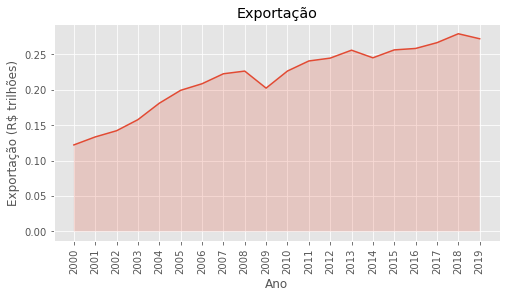

<ipython-input-15-55869023616f>:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(['{:,.2f}'.format(x) + "%" for x in 100*g.get_yticks()])


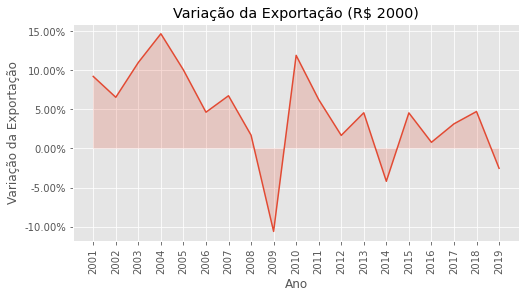

<ipython-input-15-55869023616f>:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2f}'.format(x) + "%" for x in 100*ax.get_yticks()])


<Figure size 576x288 with 0 Axes>

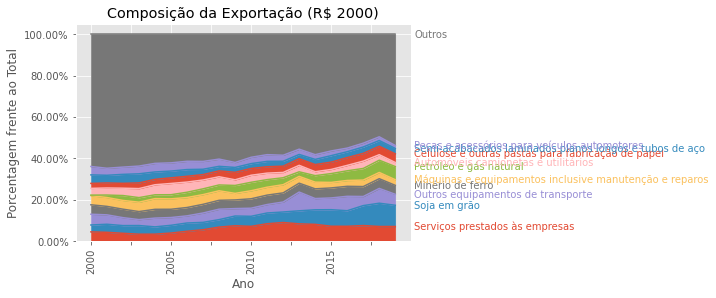

In [17]:
## Gerando os gráficos para exportação
gera_graficos("Exportação")

Note que, ao contrário da produção, a pauta primária (agricultura e indústrias extrativas) aparece muito forte nas exportações, tendo ganhado espaço nos últimos anos (em particular, Soja e Petróleo).

Além disso, também há a participação da indústria automativa (Outros equipamentos de transporte, Peças e Acessórios e Automóveis, Caminhonetes e Utilitários), que vem perdendo espaço ao longo dos anos para a agropecuária e extração.

<ipython-input-15-55869023616f>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(['{:,.2f}'.format(x) for x in g.get_yticks()/1000000])


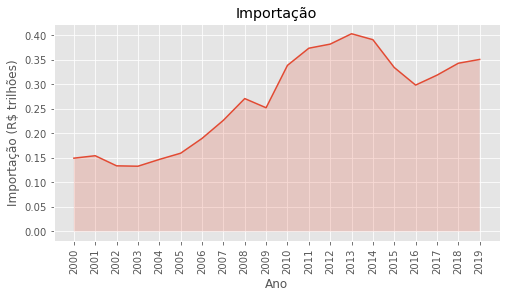

<ipython-input-15-55869023616f>:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(['{:,.2f}'.format(x) + "%" for x in 100*g.get_yticks()])


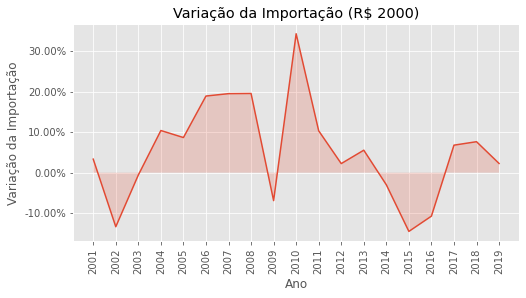

<ipython-input-15-55869023616f>:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2f}'.format(x) + "%" for x in 100*ax.get_yticks()])


<Figure size 576x288 with 0 Axes>

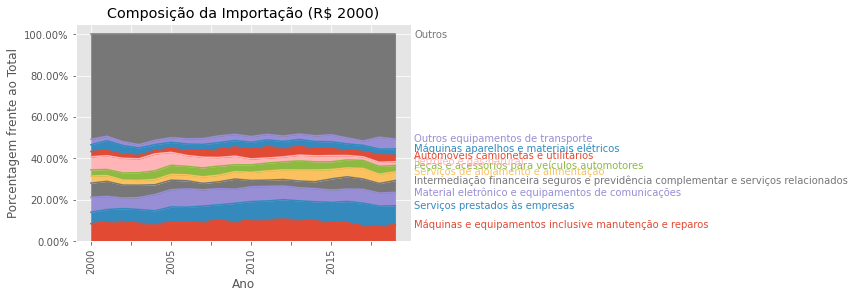

In [18]:
## Gerando os gráficos para importação
gera_graficos("Importação")

Diferentemente das exportações, nossa pauta de importação é concentrada em Máquinas, Equipamentos e Materiais Eletrônicos, além de vários produtos do setor terciário (Serviços).

Note também que a importação de Petróleo (rosa claro) teve uma importância cada vez menor ao longo dos anos.

## Consumo e Investimento

### Consumo e Produção

<ipython-input-15-55869023616f>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(['{:,.2f}'.format(x) for x in g.get_yticks()/1000000])


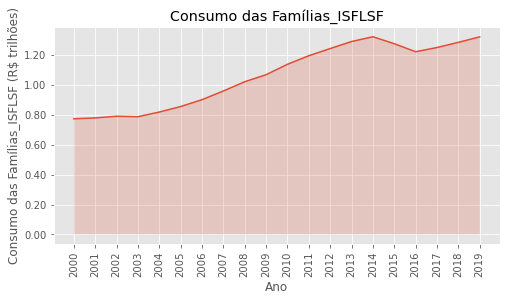

<ipython-input-15-55869023616f>:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(['{:,.2f}'.format(x) + "%" for x in 100*g.get_yticks()])


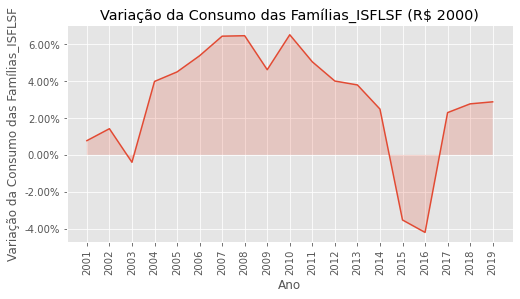

<ipython-input-15-55869023616f>:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2f}'.format(x) + "%" for x in 100*ax.get_yticks()])


<Figure size 576x288 with 0 Axes>

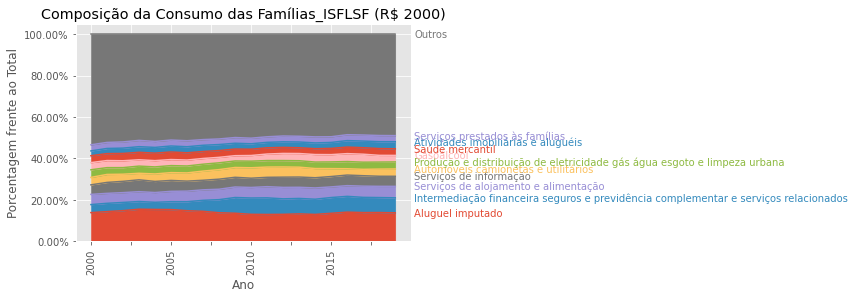

In [19]:
## Gerando os gráficos para consumo
gera_graficos("Consumo das Famílias_ISFLSF")

Resultados interessantes: o consumo se dá majoritariamente por serviços.

Além disso, note que o consumo tende a ser menos volátil que a produção (abaixo) e ainda mais volátil que o investimento (mais abaixo).

Em economês, diz-se que o consumo estaria mais condizente com a Teoria da Renda Permanente, que diz que as famílias suavizam o consumo tanto em termos de vacas gordas (poupam mais) quanto em períodos ruins (tomam empréstimos / consomem poupança).

<ipython-input-15-55869023616f>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(['{:,.2f}'.format(x) for x in g.get_yticks()/1000000])


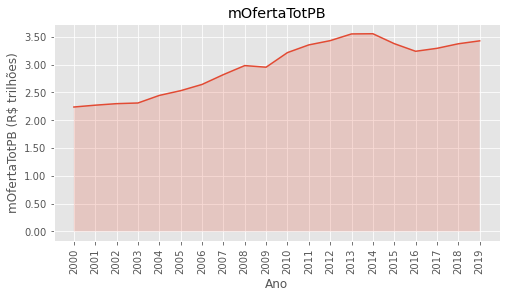

<ipython-input-15-55869023616f>:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(['{:,.2f}'.format(x) + "%" for x in 100*g.get_yticks()])


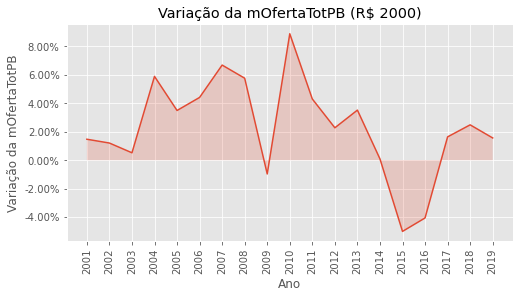

<ipython-input-15-55869023616f>:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2f}'.format(x) + "%" for x in 100*ax.get_yticks()])


<Figure size 576x288 with 0 Axes>

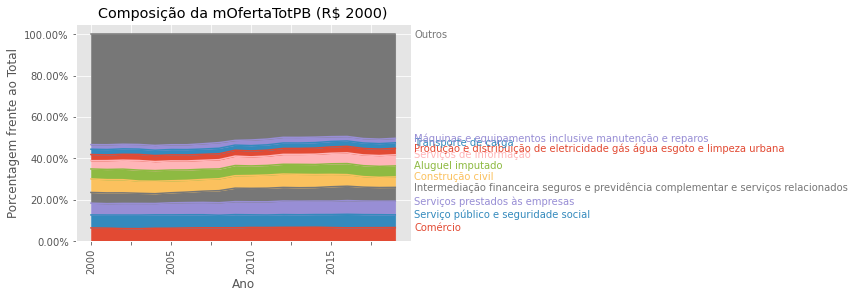

In [20]:
## Relembrando os gráficos para produção, mas agora considerando componentes importados
gera_graficos("mOfertaTotPB")

### Investimento

<ipython-input-15-55869023616f>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(['{:,.2f}'.format(x) for x in g.get_yticks()/1000000])


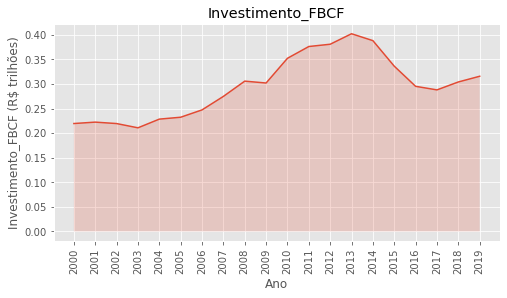

<ipython-input-15-55869023616f>:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(['{:,.2f}'.format(x) + "%" for x in 100*g.get_yticks()])


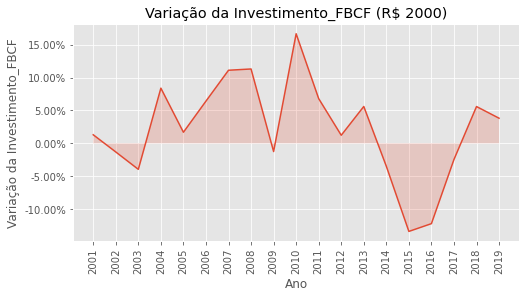

<ipython-input-15-55869023616f>:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2f}'.format(x) + "%" for x in 100*ax.get_yticks()])


<Figure size 576x288 with 0 Axes>

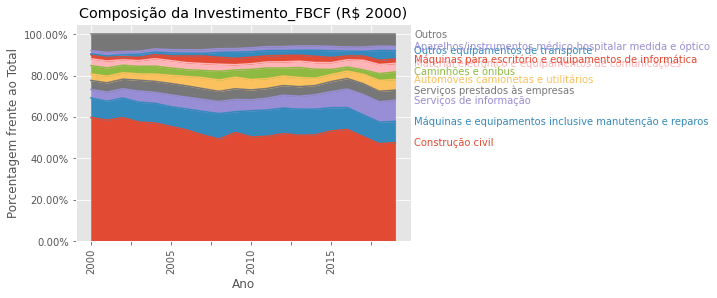

In [21]:
## Gerando os gráficos para investimento
gera_graficos("Investimento_FBCF")

De modo geral, o investimento é o componente mais volátil do PIB, uma vez que depende muito das expectativas dos agentes com relação ao futuro.

Além disso, note como a Construção Civil - apesar de ser o principal produto investido - tem perido espaço ao longo dos anos. Na contramão, Serviços de Informação (tecnologia) ganhou importância.

## Consumo do Governo e Impostos Indiretos

Impostos indiretos: sobre produtos e serviços (não inclui aqui, por exemplo, Imposto de Renda).
Exemplos: IPI, ICMS...

<ipython-input-25-32f4dab9a1b4>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(['{:,.2f}'.format(x) for x in g.get_yticks()/1000000])


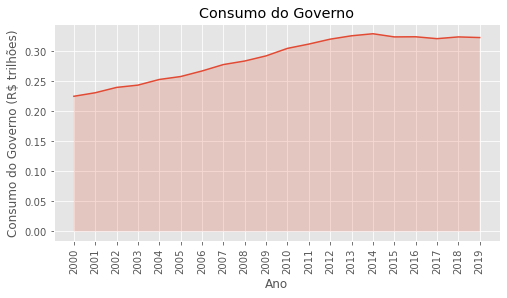

<ipython-input-25-32f4dab9a1b4>:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(['{:,.2f}'.format(x) + "%" for x in 100*g.get_yticks()])


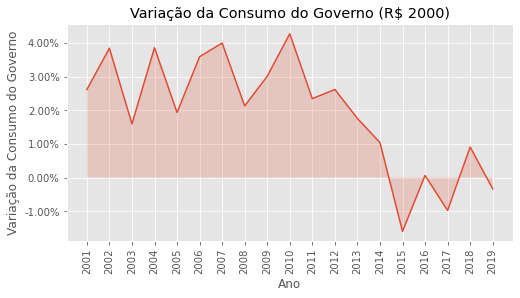

<ipython-input-25-32f4dab9a1b4>:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2f}'.format(x) + "%" for x in 100*ax.get_yticks()])


<Figure size 576x288 with 0 Axes>

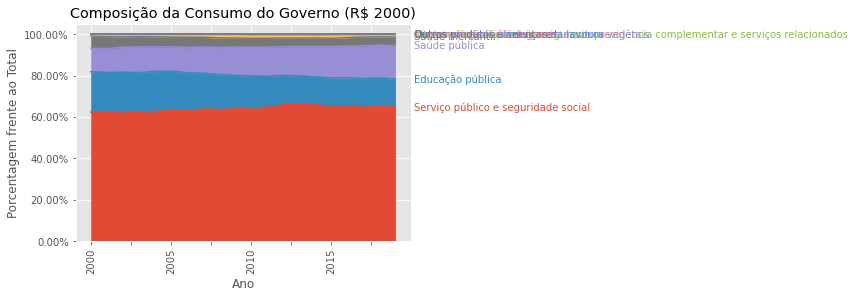

In [26]:
## Gerando os gráficos para consumo do governo
gera_graficos("Consumo do Governo")

Períodos de alto crescimento na década de 2000, mas crescimento tímido/queda a partir de 2015 (recessão) e 2016 (Teto de Gastos).

Idealmente, os gastos do governo seriam contra-cíclicos: menores em períodos de crescimento econômico, mas maiores em tempos de vacas magras para estimular a economia.
Os dados mostram que, no Brasil, esse componente tem sido muito pró-cíclico nos últimos 20 anos.

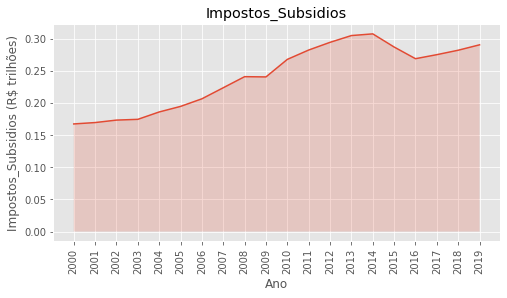

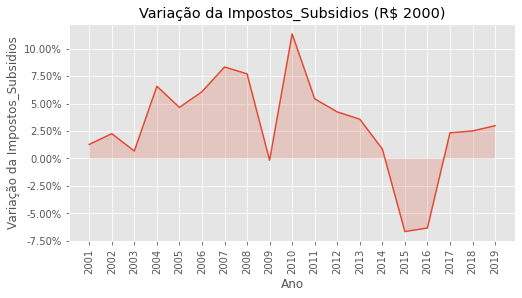

<Figure size 576x288 with 0 Axes>

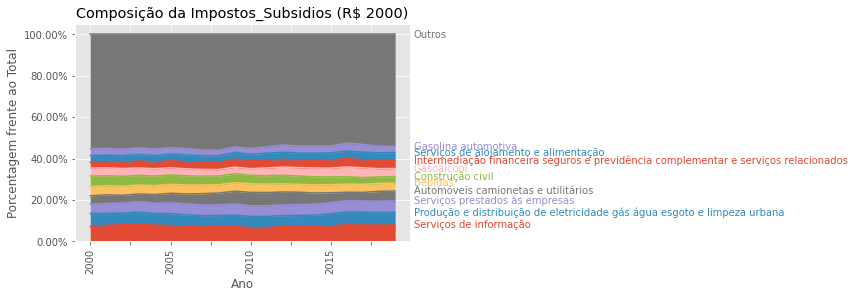

In [25]:
## Gerando os gráficos para tributos
gera_graficos("Impostos_Subsidios")

Note que a arrecadação é pró-cíclica: quanto melhor vai a economia, melhor a arrecadação de impostos.

## Painel: A produção depende mais do consumo, do investimento ou de outras variáveis?

### Dados

In [52]:
## Vamos criar um painel - em que os indivíduos vão ser os setores e o tempo os anos
## Cada setor terá, em cada ano, as variáveis que investigamos antes

## Vamos demonstrar o que vai ser feito com os dados de produção e, depois, usaremos merges para adicionar todas as variáveis
## O que queremos fazer é transformar os dados para um formato longo
## Para isso, vamos usar a função melt que irá "derreter" o DataFrame (oposto de pivot)

# Criando coluna com os setores
dfProducao["Setor"] = dfProducao.index

# Derretendo
dfProducaoLongo = pd.melt(dfProducao, id_vars=["Setor"], var_name="Ano", value_name="Produção")

# Transformando em log (vai ajudar porque dará aos modelos interpretações percentuais)
dfProducaoLongo["Produção"] = np.where(
    dfProducaoLongo["Produção"] <= 0,
    0,
    np.log(dfProducaoLongo["Produção"])
)

## Vendo resultado
dfProducaoLongo

,Setor,Ano,Produção
0,Arroz em casca,2000,7.656693
1,Milho em grão,2000,8.701634
2,Trigo em grão e outros cereais,2000,6.282056
3,Cana-de-açúcar,2000,9.240737
4,Soja em grão,2000,9.156979
...,...,...,...
2135,Serviços associativos,2019,10.138507
2136,Serviços domésticos,2019,9.736286
2137,Educação pública,2019,10.686643
2138,Saúde pública,2019,10.863012


In [53]:
## Vamos loopar sobre todas as tabelas
# Primeiro, criaremos um Dataframe com os dados de Producao
dfPainel = dfProducaoLongo.copy()

# Loopando
for nNome, sNome in enumerate(vNomes):
    if nNome != 6:
        # Lendo os dados (não vamos ler o de produção de novo)
        df = pd.read_excel(f"{sCaminho}{sArquivo}", sheet_name=sNome, index_col=0)

        # Criando coluna com os setores
        df["Setor"] = df.index

        # Derretendo
        df = pd.melt(df, id_vars=["Setor"], var_name="Ano", value_name=sNome)

        # Transformando em log (vai ajudar porque dará aos modelos interpretações percentuais)
        df[sNome] = np.where(
            df[sNome] <= 0,
            0,
            np.log(df[sNome])
        )

        ## Joinando com o dfPainel
        dfPainel = dfPainel.merge(df, how="left", on=["Setor", "Ano"])

## Vendo resultado (teremos alguns warnings por causa do log, mas isso é corrigido com o np.where)
dfPainel

/Users/vinicius/opt/anaconda3/envs/datascience/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/vinicius/opt/anaconda3/envs/datascience/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/vinicius/opt/anaconda3/envs/datascience/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/vinicius/opt/anaconda3/envs/datascience/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/vinicius/opt/anaconda3/envs/datascience/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = ge

,Setor,Ano,Produção,Exportação,Consumo do Governo,Consumo das Famílias_ISFLSF,Investimento_FBCF,Impostos_Subsidios,Importação,mOfertaTotPB,mOfertaTotPC
0,Arroz em casca,2000,7.656693,0.000000,0.000000,4.894004,0.0,0.000000,3.891820,7.679599,7.788652
1,Milho em grão,2000,8.701634,2.832952,0.000000,6.818944,0.0,4.150024,5.905362,8.760881,8.901067
2,Trigo em grão e outros cereais,2000,6.282056,0.002478,0.000000,5.035735,0.0,0.000000,7.559038,7.805021,7.887011
3,Cana-de-açúcar,2000,9.240737,0.000000,0.000000,5.583604,0.0,5.815916,0.000000,9.240737,9.328965
4,Soja em grão,2000,9.156979,8.310362,0.000000,2.061423,0.0,3.840421,5.910730,9.195161,9.294704
...,...,...,...,...,...,...,...,...,...,...,...
2135,Serviços associativos,2019,10.138507,0.000000,0.000000,10.017468,0.0,0.000000,0.000000,10.138507,10.138507
2136,Serviços domésticos,2019,9.736286,0.000000,0.000000,9.736286,0.0,0.000000,0.000000,9.736286,9.736286
2137,Educação pública,2019,10.686643,0.000000,10.686643,0.000000,0.0,0.000000,0.000000,10.686643,10.686643
2138,Saúde pública,2019,10.863012,0.000000,10.863012,0.000000,0.0,0.000000,0.000000,10.863012,10.863012


In [54]:
## Vamos criar a estrutura do painel
# Ordenando
dfPainel.sort_values(["Setor", "Ano"], inplace=True)

# Transformando Ano em número
dfPainel["Ano"] = dfPainel["Ano"].astype(int)

# Coluna auxiliar para ainda ter os Anos como coluna após a estrutura do painel
dfPainel["Ano_Col"] = dfPainel["Ano"]

# Estrutura de painel
dfPainel = dfPainel.set_index(["Setor", "Ano"])

# Resultado
dfPainel

Produção  Exportação  \
Setor                                             Ano                           
Abate e preparação de produtos de carne           2000   9.958639    7.478935   
                                                  2001  10.021980    7.908903   
                                                  2002  10.047182    8.204702   
                                                  2003  10.060055    8.389456   
                                                  2004  10.181101    8.691582   
...                                                           ...         ...   
Óleos de milho amidos e féculas vegetais e rações 2015   9.060286    5.806388   
                                                  2016   9.052092    5.903081   
                                                  2017   9.056828    6.150479   
                                                  2018   9.034515    6.043599   
                                                  2019   9.075107    6.047653   

                                                        Consumo do Governo  \
Setor                                             Ano                        
Abate e preparação de produtos de carne           2000            0.000000   
                                                  2001            0.000000   
                                                  2002            0.000000   
                                                  2003            0.000000   
                                                  2004            0.000000   
...                                                                    ...   
Óleos de milho amidos e féculas vegetais e rações 2015            2.080310   
                                                  2016            1.461271   
                                                  2017            1.343488   
                                                  2018            1.209957   
                                                  2019            0.873484   

                                                        Consumo das Famílias_ISFLSF  \
Setor                                             Ano                                 
Abate e preparação de produtos de carne           2000                     9.941760   
                                                  2001                     9.962123   
                                                  2002                     9.946755   
                                                  2003                     9.943990   
                                                  2004                    10.028712   
...                                                                             ...   
Óleos de milho amidos e féculas vegetais e rações 2015                     8.478814   
                                                  2016                     8.395706   
                                                  2017                     8.433743   
                                                  2018                     8.421450   
                                                  2019                     8.461986   

                                                        Investimento_FBCF  \
Setor                                             Ano                       
Abate e preparação de produtos de carne           2000                0.0   
                                                  2001                0.0   
                                                  2002                0.0   
                                                  2003                0.0   
                                                  2004                0.0   
...                                                                   ...   
Óleos de milho amidos e féculas vegetais e rações 2015                0.0   
                                                  2016                0.0   
                                                  2017                0.0   
         

In [64]:
## Vamos criar colunas com o investimento defasado (o investimento de um ano pode ter efeito só na produção dos anos seguintes)
dfPainel["Investimento_FBCF_1"] = dfPainel["Investimento_FBCF"].shift(1)

## Removendo os valores de 2000 (diriam respeito ao FBCF de 2019 do outro setor)
dfPainelInv = dfPainel.query("Ano_Col > 2000")

# Resultado
dfPainelInv

Produção  Exportação  \
Setor                                             Ano                           
Abate e preparação de produtos de carne           2001  10.021980    7.908903   
                                                  2002  10.047182    8.204702   
                                                  2003  10.060055    8.389456   
                                                  2004  10.181101    8.691582   
                                                  2005  10.174351    8.737955   
...                                                           ...         ...   
Óleos de milho amidos e féculas vegetais e rações 2015   9.060286    5.806388   
                                                  2016   9.052092    5.903081   
                                                  2017   9.056828    6.150479   
                                                  2018   9.034515    6.043599   
                                                  2019   9.075107    6.047653   

                                                        Consumo do Governo  \
Setor                                             Ano                        
Abate e preparação de produtos de carne           2001            0.000000   
                                                  2002            0.000000   
                                                  2003            0.000000   
                                                  2004            0.000000   
                                                  2005            0.000000   
...                                                                    ...   
Óleos de milho amidos e féculas vegetais e rações 2015            2.080310   
                                                  2016            1.461271   
                                                  2017            1.343488   
                                                  2018            1.209957   
                                                  2019            0.873484   

                                                        Consumo das Famílias_ISFLSF  \
Setor                                             Ano                                 
Abate e preparação de produtos de carne           2001                     9.962123   
                                                  2002                     9.946755   
                                                  2003                     9.943990   
                                                  2004                    10.028712   
                                                  2005                     9.998505   
...                                                                             ...   
Óleos de milho amidos e féculas vegetais e rações 2015                     8.478814   
                                                  2016                     8.395706   
                                                  2017                     8.433743   
                                                  2018                     8.421450   
                                                  2019                     8.461986   

                                                        Investimento_FBCF  \
Setor                                             Ano                       
Abate e preparação de produtos de carne           2001                0.0   
                                                  2002                0.0   
                                                  2003                0.0   
                                                  2004                0.0   
                                                  2005                0.0   
...                                                                   ...   
Óleos de milho amidos e féculas vegetais e rações 2015                0.0   
                                                  2016                0.0   
                                                  2017                0.0   
         

### MQOs Agrupados

In [56]:
## Modelo de MQO Agrupado
# Fórmula
# Q(): permite a adição de variáveis com espaço
# C(): torna s variáveis categóricas
formula1 = "Produção ~ 1 + Q('Consumo das Famílias_ISFLSF') + Investimento_FBCF + C(Ano_Col)"

# Modelo
modelo1 = PooledOLS.from_formula(formula=formula1, data=dfPainel).fit(cov_type="robust")

# Sumário
print(modelo1.summary)

                          PooledOLS Estimation Summary                          
Dep. Variable:               Produção   R-squared:                        0.1469
Estimator:                  PooledOLS   R-squared (Between):              0.1434
No. Observations:                2140   R-squared (Within):               0.3244
Date:                Fri, Dec 10 2021   R-squared (Overall):              0.1469
Time:                        15:00:18   Log-likelihood                   -3355.3
Cov. Estimator:                Robust                                           
                                        F-statistic:                      17.364
Entities:                         107   P-value                           0.0000
Avg Obs:                       20.000   Distribution:                 F(21,2118)
Min Obs:                       20.000                                           
Max Obs:                       20.000   F-statistic (robust):             12.054
                            

In [57]:
## Retirando as variáveis temporais (insignificantes)
# Fórmula
formula2 = "Produção ~ 1 + Q('Consumo das Famílias_ISFLSF') + Investimento_FBCF"

# Modelo
modelo2 = PooledOLS.from_formula(formula=formula2, data=dfPainel).fit(cov_type="robust")

# Sumário
print(modelo2.summary)

# Um aumento de 10% no Consumo aumenta em pouco menos de 1% (0,96%) a produção
# Um aumento de 10% no Investimento aumenta em cerca de 0,832% a produção

                          PooledOLS Estimation Summary                          
Dep. Variable:               Produção   R-squared:                        0.1427
Estimator:                  PooledOLS   R-squared (Between):              0.1434
No. Observations:                2140   R-squared (Within):               0.1075
Date:                Fri, Dec 10 2021   R-squared (Overall):              0.1427
Time:                        15:00:27   Log-likelihood                   -3360.5
Cov. Estimator:                Robust                                           
                                        F-statistic:                      177.86
Entities:                         107   P-value                           0.0000
Avg Obs:                       20.000   Distribution:                  F(2,2137)
Min Obs:                       20.000                                           
Max Obs:                       20.000   F-statistic (robust):             120.57
                            

In [63]:
## Vamos usar o investimento defasado agora
# Fórmula
formula3 = "Produção ~ 1 + Q('Consumo das Famílias_ISFLSF') + Investimento_FBCF_1"

# Modelo
modelo3 = PooledOLS.from_formula(formula=formula3, data=dfPainelInv).fit(cov_type="robust")

# Sumário
print(modelo3.summary)

# Quase nada mudou! Vamos optar pelo modelo sem a defasagem e incluir outras variáveis

                          PooledOLS Estimation Summary                          
Dep. Variable:               Produção   R-squared:                        0.1421
Estimator:                  PooledOLS   R-squared (Between):              0.1436
No. Observations:                1819   R-squared (Within):               0.0354
Date:                Fri, Dec 10 2021   R-squared (Overall):              0.1421
Time:                        15:04:59   Log-likelihood                   -2864.9
Cov. Estimator:                Robust                                           
                                        F-statistic:                      150.36
Entities:                         107   P-value                           0.0000
Avg Obs:                       17.000   Distribution:                  F(2,1816)
Min Obs:                       17.000                                           
Max Obs:                       17.000   F-statistic (robust):             98.243
                            

In [67]:
# Fórmula com mais variáveis
formula4 = "Produção ~ 1 + Q('Consumo das Famílias_ISFLSF') + Investimento_FBCF + Exportação + Q('Consumo do Governo') + Importação"

# Modelo
modelo4 = PooledOLS.from_formula(formula=formula4, data=dfPainel).fit(cov_type="robust")

# Sumário
print(modelo4.summary)

# Curiosamente, o maior componente é o consumo do governo: um aumento de 10% levaria a um aumento de 2,3% na Produção

                          PooledOLS Estimation Summary                          
Dep. Variable:               Produção   R-squared:                        0.3436
Estimator:                  PooledOLS   R-squared (Between):              0.3535
No. Observations:                2140   R-squared (Within):              -0.1619
Date:                Fri, Dec 10 2021   R-squared (Overall):              0.3436
Time:                        15:07:46   Log-likelihood                   -3074.8
Cov. Estimator:                Robust                                           
                                        F-statistic:                      223.41
Entities:                         107   P-value                           0.0000
Avg Obs:                       20.000   Distribution:                  F(5,2134)
Min Obs:                       20.000                                           
Max Obs:                       20.000   F-statistic (robust):             239.68
                            

#### Efeitos Fixos

In [71]:
## Mesmos modelos da seção anterior, mas agora controlando para efeitos fixos de cada setor

# Fórmula
formula5 = f"{formula1} + EntityEffects"

# Modelo (não é mais PooledOLS, mas sim PanelOLS)
modelo5 = PanelOLS.from_formula(formula=formula5, data=dfPainel).fit(cov_type="robust")

# Sumário
print(modelo5.summary)

# Resultados ficam beeem diferentes: efeitos temporais passam a ser significativos
# Coeficiente do consumo presente aumenta e o investimento cai, ficando muito pequeno e
# a beira da insignificância estatística

                          PanelOLS Estimation Summary                           
Dep. Variable:               Produção   R-squared:                        0.4556
Estimator:                   PanelOLS   R-squared (Between):             -0.4330
No. Observations:                2140   R-squared (Within):               0.4556
Date:                Fri, Dec 10 2021   R-squared (Overall):             -0.4160
Time:                        15:11:00   Log-likelihood                    1353.5
Cov. Estimator:                Robust                                           
                                        F-statistic:                      80.178
Entities:                         107   P-value                           0.0000
Avg Obs:                       20.000   Distribution:                 F(21,2012)
Min Obs:                       20.000                                           
Max Obs:                       20.000   F-statistic (robust):             60.881
                            

In [75]:
# Fórmula com defasagem
formula6 = "Produção ~ 1 + Q('Consumo das Famílias_ISFLSF') + C(Ano_Col) + Investimento_FBCF_1 + EntityEffects"

# Modelo (não é mais PooledOLS, mas sim PanelOLS)
modelo6 = PanelOLS.from_formula(formula=formula6, data=dfPainelInv).fit(cov_type="robust")

# Sumário
print(modelo6.summary)

# Com efeitos fixos, o resultado do investimento defasado é ainda menor

                          PanelOLS Estimation Summary                           
Dep. Variable:               Produção   R-squared:                        0.4458
Estimator:                   PanelOLS   R-squared (Between):             -0.4743
No. Observations:                2033   R-squared (Within):               0.4458
Date:                Fri, Dec 10 2021   R-squared (Overall):             -0.4582
Time:                        15:13:31   Log-likelihood                    1364.3
Cov. Estimator:                Robust                                           
                                        F-statistic:                      76.650
Entities:                         107   P-value                           0.0000
Avg Obs:                       19.000   Distribution:                 F(20,1906)
Min Obs:                       19.000                                           
Max Obs:                       19.000   F-statistic (robust):             55.982
                            

In [77]:
## Por fim, modelo completo com efeitos fixos
# Fórmula
formula7 = f"{formula4} + EntityEffects + C(Ano_Col)"

# Modelo (não é mais PooledOLS, mas sim PanelOLS)
modelo7 = PanelOLS.from_formula(formula=formula7, data=dfPainel).fit(cov_type="robust")

# Sumário
print(modelo7.summary)

# Note como o consumo do governo agora é insignificante! Além disso, o alto coeficiente de consumo se mantém
# Destaque também para o coeficiente de Exportações, o maior dentre os demais

                          PanelOLS Estimation Summary                           
Dep. Variable:               Produção   R-squared:                        0.4833
Estimator:                   PanelOLS   R-squared (Between):             -0.4360
No. Observations:                2140   R-squared (Within):               0.4833
Date:                Fri, Dec 10 2021   R-squared (Overall):             -0.4184
Time:                        15:15:01   Log-likelihood                    1409.3
Cov. Estimator:                Robust                                           
                                        F-statistic:                      78.287
Entities:                         107   P-value                           0.0000
Avg Obs:                       20.000   Distribution:                 F(24,2009)
Min Obs:                       20.000                                           
Max Obs:                       20.000   F-statistic (robust):             59.164
                            

Em resumo, o modelo de Efeitos Fixos mostra que os ganhos de produção são, em sua grande parte, movidos por efeitos temporais estruturais e pelo consumo das famílias, sendo o investimento uma variável não muito importante (nos nossos dados, em modelos mais refinados e com vários países ela se torna bem importante).

Além disso, chama atenção o viés de Consumo do Governo presente nos modelos MQO Agrupados; lembre-se, sempre temos que considerar efeitos não-observáveis que possam estar correlacionados com as nossas variáveis!

# Obrigado e Bom Sábado a Todos!